In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
from thop import profile

import numpy as np

In [38]:
alexnet = models.alexnet(pretrained=True)
vgg16 = models.vgg16(pretrained=True)


alexnet_cifar = torch.load("cifar10_net2.pt", map_location=torch.device('cpu'))
alexnet_cifar
alexnet_mnist = torch.load("mnist_net1.pt", map_location=torch.device("cpu"))
alexnet_mnist

AlexNet(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 3, kernel_size=(1, 1), stride=(1, 1))
      (1): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    )
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout

In [39]:
input_ = torch.randn(1, 3, 224, 224)

In [40]:
for name, net in ("alexnet", alexnet), ("vgg16", vgg16):
    macs, params = profile(net, inputs=(input_,))
    print(name, "--->", params)

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
alexnet ---> 61100840.0
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register coun

/home/petra/miniconda3/envs/sima/lib/python3.9/site-packages/thop/vision/basic_hooks.py:115: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  kernel = torch.DoubleTensor([*(x[0].shape[2:])]) // torch.DoubleTensor(


In [5]:
from pytorch_model_summary import summary

In [36]:
for net in alexnet, vgg16:
    print(summary(net, torch.zeros((1, 3, 224, 224)), show_input=True))

-----------------------------------------------------------------------------
           Layer (type)          Input Shape         Param #     Tr. Param #
               Conv2d-1     [1, 3, 224, 224]          23,296          23,296
                 ReLU-2      [1, 64, 55, 55]               0               0
            MaxPool2d-3      [1, 64, 55, 55]               0               0
               Conv2d-4      [1, 64, 27, 27]         307,392         307,392
                 ReLU-5     [1, 192, 27, 27]               0               0
            MaxPool2d-6     [1, 192, 27, 27]               0               0
               Conv2d-7     [1, 192, 13, 13]         663,936         663,936
                 ReLU-8     [1, 384, 13, 13]               0               0
               Conv2d-9     [1, 384, 13, 13]         884,992         884,992
                ReLU-10     [1, 256, 13, 13]               0               0
              Conv2d-11     [1, 256, 13, 13]         590,080         590,08

In [41]:
numpy_filters = {
    "alexnet": [],
    "alexnet_cifar": [],
    "alexnet_mnist": []
}

for netname, net in ("alexnet", alexnet), ("alexnet_cifar", alexnet_cifar), ("alexnet_mnist", alexnet_mnist):
    for name, param in net.named_parameters():
        print(f"{name}: {param.data.shape}")
        if name.endswith(".weight") and name.startswith("features"):
            numpy_filters[netname].append(np.array(param.data).ravel())

features.0.weight: torch.Size([64, 3, 11, 11])
features.0.bias: torch.Size([64])
features.3.weight: torch.Size([192, 64, 5, 5])
features.3.bias: torch.Size([192])
features.6.weight: torch.Size([384, 192, 3, 3])
features.6.bias: torch.Size([384])
features.8.weight: torch.Size([256, 384, 3, 3])
features.8.bias: torch.Size([256])
features.10.weight: torch.Size([256, 256, 3, 3])
features.10.bias: torch.Size([256])
classifier.1.weight: torch.Size([4096, 9216])
classifier.1.bias: torch.Size([4096])
classifier.4.weight: torch.Size([4096, 4096])
classifier.4.bias: torch.Size([4096])
classifier.6.weight: torch.Size([1000, 4096])
classifier.6.bias: torch.Size([1000])
features.0.weight: torch.Size([64, 3, 11, 11])
features.0.bias: torch.Size([64])
features.3.weight: torch.Size([192, 64, 5, 5])
features.3.bias: torch.Size([192])
features.6.weight: torch.Size([384, 192, 3, 3])
features.6.bias: torch.Size([384])
features.8.weight: torch.Size([256, 384, 3, 3])
features.8.bias: torch.Size([256])
featu

In [42]:
all_params = {
    "alexnet": np.hstack(numpy_filters["alexnet"]),
    "alexnet_cifar": np.hstack(numpy_filters["alexnet_cifar"]),
    "alexnet_mnist": np.hstack(numpy_filters["alexnet_mnist"])
}
    

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
for netname in "alexnet", "alexnet_cifar", "alexnet_mnist":
    print(netname, all_params[netname].min(), all_params[netname].max())

alexnet -0.8341745 2.2269735
alexnet_cifar -0.15827154 0.09936089
alexnet_mnist -0.122428745 0.67382056


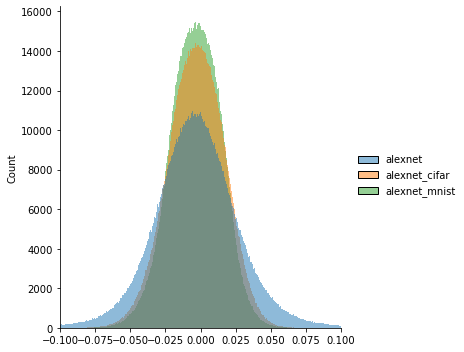

In [45]:
ax = sns.displot(all_params)
ax.set(xlim=(-0.1, 0.1));

In [46]:
netname = "alexnet_mnist"
len(all_params[netname])

2468547

In [47]:
(np.abs(all_params[netname]) <= 0.1).sum() / len(all_params[netname])

0.999994328647581

In [48]:
(np.abs(all_params[netname]) <= 0.01).sum() / len(all_params[netname])

0.40666797107772307

In [49]:
(np.abs(all_params[netname]) <= 0.001).sum() / len(all_params[netname])

0.041843643244386275

In [50]:
(np.abs(all_params[netname]) <= 0.0001).sum() / len(all_params[netname])

0.0041797867328432475

In [51]:
(np.abs(all_params[netname]) <= 0.00001).sum() / len(all_params[netname])

0.0004306176872467893

In [52]:
np.isclose(all_params[netname], 0, atol=1e-02).sum() / len(all_params[netname])

0.40666797107772307